In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
import masw_functions as mf
import subprocess
import os
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [62]:
filenames=["dispersion_header.pkl","dispersion_images.pkl"]
for filename in filenames:
    if os.path.isfile(filename):
        print(filename+" exists.")
    else: 
        url = 'https://filedn.com/lEzjnrJwSG47nSDwzIitUuf'
        folder='/Data/swi_python/'
        command = ['wget', url+folder+filename]
        subprocess.run(command)

header = pd.read_pickle(filenames[0])
dimage = pd.read_pickle(filenames[1])

dispersion_header.pkl exists.


--2024-10-16 14:57:42--  https://filedn.com/lEzjnrJwSG47nSDwzIitUuf/Data/swi_python/dispersion_images.pkl
Resolving filedn.com (filedn.com)... 74.120.9.25
Connecting to filedn.com (filedn.com)|74.120.9.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1107743958 (1.0G) [application/octet-stream]
Saving to: ‘dispersion_images.pkl’

     0K .......... .......... .......... .......... ..........  0%  489K 36m51s
    50K .......... .......... .......... .......... ..........  0%  566K 34m21s
   100K .......... .......... .......... .......... ..........  0%  584K 33m11s
   150K .......... .......... .......... .......... ..........  0%  610K 32m16s
   200K .......... .......... .......... .......... ..........  0%  638K 31m28s
   250K .......... .......... .......... .......... ..........  0%  601K 31m13s
   300K .......... .......... .......... .......... ..........  0%  768K 30m7s
   350K .......... .......... .......... .......... ..........  0%  788K 29m13s
 

In [63]:
header

,Shot,Backazimuth,Sx,Sy,MPx,MPy,MPazimuth
0,1,180,133695.147082,1.613429e+06,<xarray.DataArray 'recx' ()>\narray(134237.178...,<xarray.DataArray 'recy' ()>\narray(1615303.66...,<xarray.DataArray 'recx' ()>\narray(16.12287737)
1,1,210,133695.147082,1.613429e+06,<xarray.DataArray 'recx' ()>\narray(135122.718...,<xarray.DataArray 'recy' ()>\narray(1614840.42...,<xarray.DataArray 'recx' ()>\narray(45.31708469)
2,1,240,133695.147082,1.613429e+06,<xarray.DataArray 'recx' ()>\narray(135714.995...,<xarray.DataArray 'recy' ()>\narray(1614088.27...,<xarray.DataArray 'recx' ()>\narray(71.91228851)
3,2,180,133276.128961,1.613502e+06,<xarray.DataArray 'recx' ()>\narray(133798.256...,<xarray.DataArray 'recy' ()>\narray(1615534.79...,<xarray.DataArray 'recx' ()>\narray(14.40735916)
4,2,210,133276.128961,1.613502e+06,<xarray.DataArray 'recx' ()>\narray(134691.405...,<xarray.DataArray 'recy' ()>\narray(1614916.31...,<xarray.DataArray 'recx' ()>\narray(45.02618018)
...,...,...,...,...,...,...,...
34229,3644,30,147627.605302,1.625926e+06,<xarray.DataArray 'recx' ()>\narray(146205.899...,<xarray.DataArray 'recy' ()>\narray(1624512.49...,<xarray.DataArray 'recx' ()>\narray(225.16732166)
34230,3644,60,147627.605302,1.625926e+06,<xarray.DataArray 'recx' ()>\narray(145609.389...,<xarray.DataArray 'recy' ()>\narray(1625292.77...,<xarray.DataArray 'recx' ()>\narray(252.58246189)
34231,3645,0,147626.850767,1.625997e+06,<xarray.DataArray 'recx' ()>\narray(147052.398...,<xarray.DataArray 'recy' ()>\narray(1624125.47...,<xarray.DataArray 'recx' ()>\narray(197.06556289)
34232,3645,30,147626.850767,1.625997e+06,<xarray.DataArray 'recx' ()>\narray(146194.003...,<xarray.DataArray 'recy' ()>\narray(1624580.34...,<xarray.DataArray 'recx' ()>\narray(225.33055284)


In [64]:
header['MPx'] = header['MPx'] .apply(lambda x: float(x.values))
header['MPy'] = header['MPy'] .apply(lambda x: float(x.values))
header['MPazimuth'] = header['MPazimuth'] .apply(lambda x: float(x.values))
header

,Shot,Backazimuth,Sx,Sy,MPx,MPy,MPazimuth
0,1,180,133695.147082,1.613429e+06,134237.178646,1.615304e+06,16.122877
1,1,210,133695.147082,1.613429e+06,135122.718028,1.614840e+06,45.317085
2,1,240,133695.147082,1.613429e+06,135714.995238,1.614088e+06,71.912289
3,2,180,133276.128961,1.613502e+06,133798.256770,1.615535e+06,14.407359
4,2,210,133276.128961,1.613502e+06,134691.405781,1.614916e+06,45.026180
...,...,...,...,...,...,...,...
34229,3644,30,147627.605302,1.625926e+06,146205.899589,1.624512e+06,225.167322
34230,3644,60,147627.605302,1.625926e+06,145609.389957,1.625293e+06,252.582462
34231,3645,0,147626.850767,1.625997e+06,147052.398784,1.624125e+06,197.065563
34232,3645,30,147626.850767,1.625997e+06,146194.003347,1.624580e+06,225.330553


In [65]:
header['MPxn'] = header['MPx'] - header['MPx'].min()
header['MPyn'] = header['MPy'] - header['MPy'].min()
header

,Shot,Backazimuth,Sx,Sy,MPx,MPy,MPazimuth,MPxn,MPyn
0,1,180,133695.147082,1.613429e+06,134237.178646,1.615304e+06,16.122877,828.177155,1619.204243
1,1,210,133695.147082,1.613429e+06,135122.718028,1.614840e+06,45.317085,1713.716537,1155.959103
2,1,240,133695.147082,1.613429e+06,135714.995238,1.614088e+06,71.912289,2305.993748,403.810887
3,2,180,133276.128961,1.613502e+06,133798.256770,1.615535e+06,14.407359,389.255279,1850.333828
4,2,210,133276.128961,1.613502e+06,134691.405781,1.614916e+06,45.026180,1282.404291,1231.848122
...,...,...,...,...,...,...,...,...,...
34229,3644,30,147627.605302,1.625926e+06,146205.899589,1.624512e+06,225.167322,12796.898099,10828.032223
34230,3644,60,147627.605302,1.625926e+06,145609.389957,1.625293e+06,252.582462,12200.388467,11608.309580
34231,3645,0,147626.850767,1.625997e+06,147052.398784,1.624125e+06,197.065563,13643.397294,10441.005681
34232,3645,30,147626.850767,1.625997e+06,146194.003347,1.624580e+06,225.330553,12785.001856,10895.883056


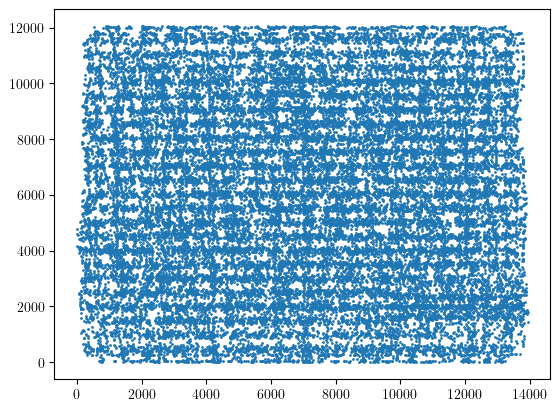

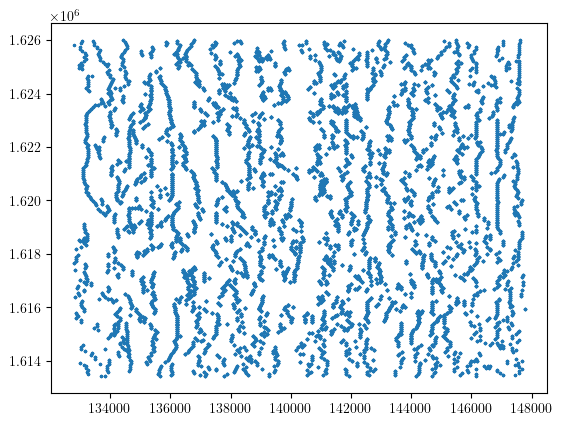

In [66]:
vmin, vmax = 600,4000
fmin, fmax = 1,5
p=np.linspace(0, 1/vmin, 101)


## Scatter Midpoints
plt.figure()
plt.scatter(header['MPxn'],header['MPyn'],s=1)
plt.show()

plt.figure()
plt.scatter(header['Sx'],header['Sy'],s=2)
plt.show()

# Select a bin

In [67]:
xmin, xmax = 5000, 5500
ymin, ymax = 10000, 10500
binx = (header['MPxn']>xmin) & (header['MPxn']<xmax)
biny = (header['MPyn']>ymin) & (header['MPyn']<ymax)
headerbin = header[binx & biny]
idbin = header[binx & biny].index
idbin.size

29

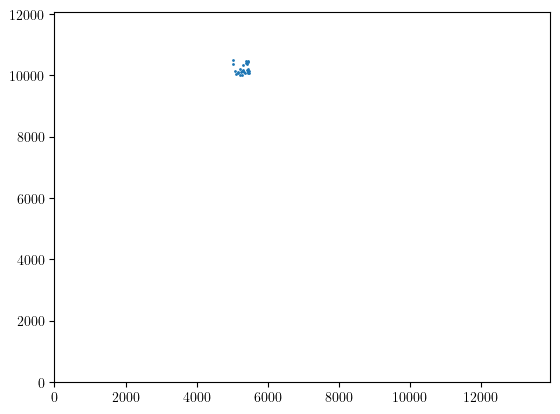

In [68]:
plt.figure()
plt.scatter(headerbin['MPxn'],headerbin['MPyn'],s=1)
plt.xlim(header['MPxn'].min(), header['MPxn'].max())  # Set x-axis limits (min, max)
plt.ylim(header['MPyn'].min(), header['MPyn'].max())  # Set y-axis limits (min, max)
plt.show()

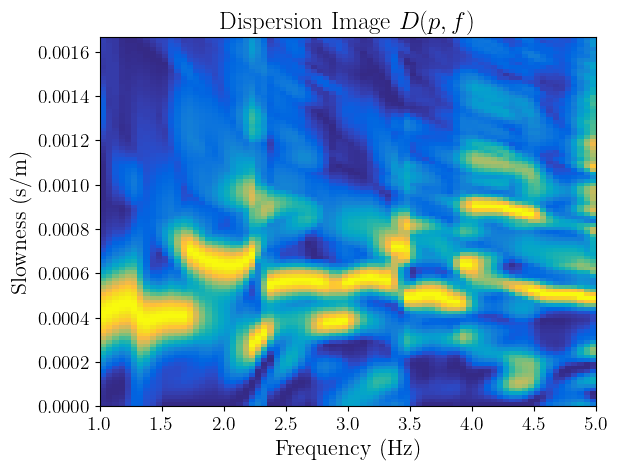

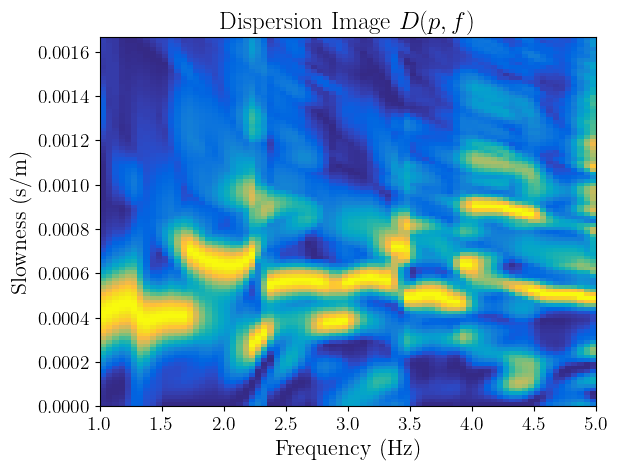

In [69]:
from IPython.display import clear_output, display
import time
%matplotlib inline
fig, ax = plt.subplots()
for idim in idbin:
    ax.imshow(dimage[idim], aspect='auto', cmap=mf.parula_cmap, origin='lower', extent=[fmin, fmax, p[0], p[-1]])
    ax.set_title('Dispersion Image $D(p,f)$', fontsize=18)
    ax.set_xlabel('Frequency (Hz)', fontsize=16)
    ax.set_ylabel('Slowness (s/m)', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)  # Set fontsize for x-ticks
    ax.tick_params(axis='y', labelsize=14)  # Set fontsize for y-ticks
    clear_output(wait=True)
    display(fig)
    time.sleep(1.0)


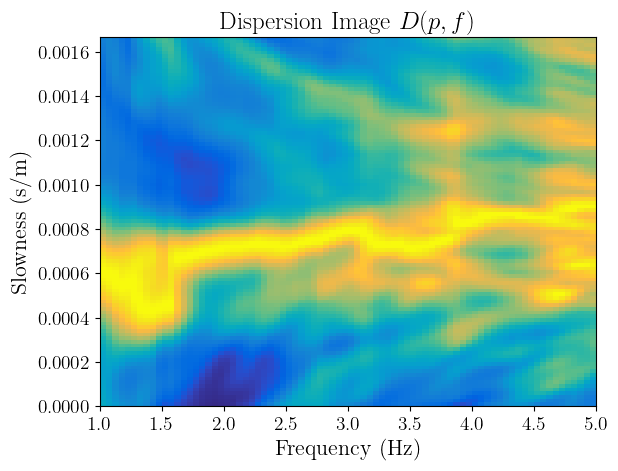

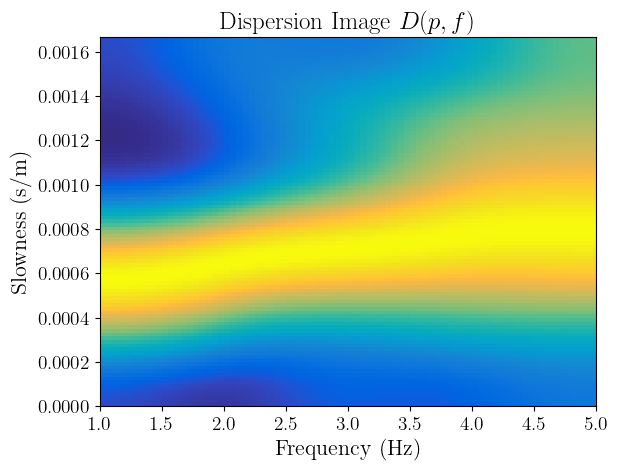

In [70]:
from scipy.ndimage import gaussian_filter
dimagestack = np.mean(np.stack([dimage[i] for i in idbin], axis=0), axis=0)
dimagestack = dimagestack/np.max(dimagestack,axis=0, keepdims=True)
#maskbin= gaussian_filter(dimagebin**2, sigma=5.0)
#dimagebin=dimagebin*maskbin
dimagebin = gaussian_filter(dimagestack**2, sigma=10.0)
dimagebin = dimagebin/np.max(dimagebin,axis=0, keepdims=True)

plt.figure()
plt.imshow(dimagestack, aspect='auto', cmap=mf.parula_cmap, origin='lower', extent=[fmin, fmax, p[0], p[-1]])
plt.title('Dispersion Image $D(p,f)$', fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Slowness (s/m)', fontsize=16)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

plt.figure()
plt.imshow(dimagebin, aspect='auto', cmap=mf.parula_cmap, origin='lower', extent=[fmin, fmax, p[0], p[-1]])
plt.title('Dispersion Image $D(p,f)$', fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Slowness (s/m)', fontsize=16)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

In [71]:
pr = p[np.argmax(dimagebin, axis=0)]
freq = np.linspace(fmin,fmax,dimagebin.shape[1])
Xobs = [freq,pr]

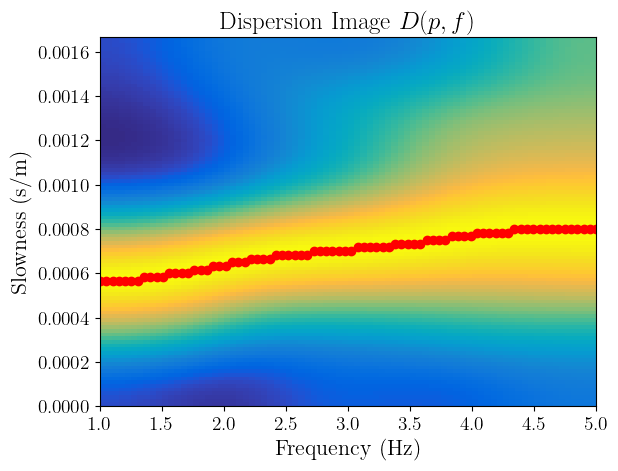

In [72]:
%matplotlib inline
plt.figure()
plt.imshow(dimagebin, aspect='auto', cmap=mf.parula_cmap, origin='lower', extent=[fmin, fmax, p[0], p[-1]])
plt.title('Dispersion Image $D(p,f)$', fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Slowness (s/m)', fontsize=16)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.scatter(Xobs[0],Xobs[1],color='red')
plt.show()


In [73]:
from scipy.interpolate import interp1d
vmin, vmax = 600,3000
vel = np.linspace(vmin,vmax,101)
pvel = 1/vel
dimagevel = np.array([interp1d(p, dimagebin[:, j], kind='linear')(pvel) for j in range(dimagebin.shape[1])]).T
Xobs = [freq,1/pr]

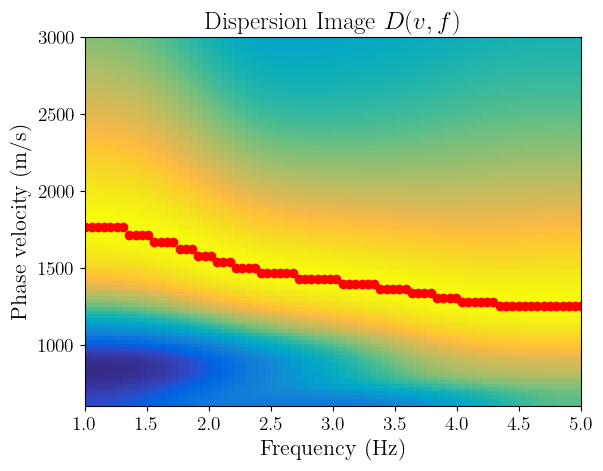

In [74]:
%matplotlib inline
plt.figure()
plt.imshow(dimagevel, aspect='auto', cmap=mf.parula_cmap, origin='lower', extent=[fmin, fmax, vmin, vmax])
plt.title('Dispersion Image $D(v,f)$', fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Phase velocity (m/s)', fontsize=16)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.scatter(Xobs[0],Xobs[1],color='red')
plt.show()